# Trabalho Final - Deep Learning and Reinforcement Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Redes Neurais Convolucionais
# Exercício #8 (OBRIGATÓRIO) - 5 PONTOS

## Inicialmente os alunos deverão escolher entre 4 datasets:

### 1. Selecionar 15 frutas distintas do dataset fruits 360 (Fácil)
### 2. Selecionar todas as frutas do dataset fruits 360 (Médio)
    Disponível em: https://www.dropbox.com/s/kzhuv6xim8ejxp3/fruits.zip
### 3. CoronaHack -Chest X-Ray-Dataset (Médio): Classificar apenas se existe Pneumonia ou Não, opcionalmente classificar a existência de COVID-19:
    Disponível em: https://www.dropbox.com/s/zmo4c6pzwcgd9c4/562468_1022626_bundle_archive.zip
### 4. Dataset Skin Cancer MNIST: HAM10000 (difícil)
    Disponível em: https://www.dropbox.com/s/8o4ysiccspp46ov/skin-cancer-mnist-ham10000.zip

## Com o dataset selecionado deve-se construir uma CNN para a classificação das imagens do dataset selecionado
### Instruções Gerais:
* Utilize a LetNet-5 como exemplo inicial bem como o exemplo visto em sala de aula do dataset minst;
* Inicie o trabalho com parte do dataset vá adicionando gradativamente mais tipos distintos de frutas;
* É permitido usar outras abordagens e arquiteturas;
* É permitido o uso de Autoencoders;
* É obrigatório o uso de CNN;
* É permitido o uso de técnicas de processamento de imagens;
* Não é permitido o uso de modelos pré-treinados;
* Faça uma boa distribuição dos dados de teste e treinamento e validação;

## Com o dataset selecionado deve-se construir uma CNN para a classificação das imagens do dataset selecionado
### Instruções Gerais:
* Aplique os pré-processamentos necessários.
* Apresente a evolução do conjunto de treino e validação.
* Apresente a acurácia do conjunto de testes (opcional).
* O conjunto de teste deve variar entre 20% e 30% do conjunto total de treinamento e deve ter a mesma proporção da quantidade de amostras por classes de forma aleatório. Para o dataset fruits360 o conjunto precisa ser construído, em outras palavras é necessário fazer uma rotina que faça isso, selecionando imagens de forma aleatória e respeitando a proporcionalidade de amostras por classes (todo tipo de fruta deve ter a mesma quantidade).
* Apresente a configuração (estrutura) da rede neural.

## Dicas:
### Utilize as instruções de leituras de diretórios de imagens do próprio Keras (semelhante ao exemplo visto com o dataset de dígitos):

### train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)

### train_generator = train_datagen.flow_from_directory('Dataset',batch_size=200,color_mode = 'grayscale',target_size=(30, 30))


## Arquitetura LeNet-5

![LeNet-5](data/lenet5.png)

**Layer 1: Convolutional** Output: 28x28x6.

**Activation**

**Pooling.** Output: 14x14x6.

**Layer 2: Convolutional**
Output: 10x10x16.

**Activation**

**Pooling**: Output: 5x5x16.

**Flatten.**: 1D

**Layer 3: Fully Connected.**
120 outputs.

**Activation**

**Layer 4: Fully Connected.**
84 outputs.

**Activation**

**Layer 5: Fully Connected (Logits)**
10 outputs.

In [13]:
# Importando as bibliotecas que poderão ser usadas no exercício:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Conv2D, Flatten, Activation, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras import preprocessing
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

from PIL import Image

import math
import time
import os

In [2]:
# Verificando se tem GPU disponível para processamento das imagens. GPU ID será exibido.

print(tf.compat.v2.test.is_gpu_available)
print("GPUs ID available: ", len(tf.config.experimental.list_physical_devices('GPU')))


<function is_gpu_available at 0x7f9cad70c280>
GPUs ID available:  1


## O dataset selecionado é o fruits-360 e vamos selecionar as seguintes 15 frutas, em pastas distintas do DataSet completo:

### 1 - Apricot
### 2 - Blueberry
### 3 - Guava
### 4 - Kiwi
### 5 - Mango
### 6 - Nectarine
### 7 - Orange
### 8 - Papaya
### 9 - Passion Fruit
### 10 - Pineappl
### 11 - Pitahaya Red
### 12 - Raspberry
### 13 - Strawberry
### 14 - Tamarillo
### 15 - Tangelo


## Abaixo um print da estrutura deste dataset menor:


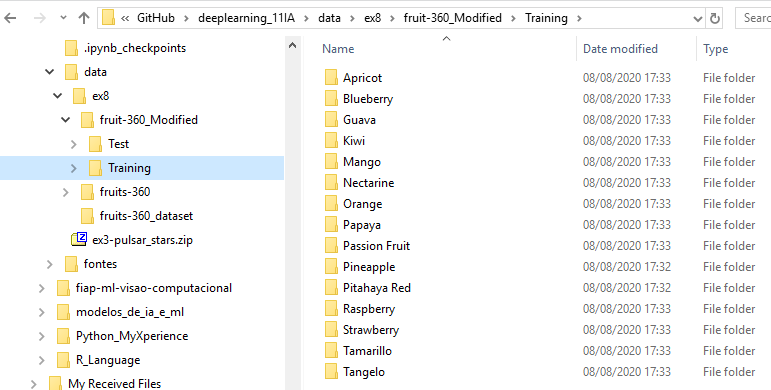

## Preparação dos Parâmetros e Setup geral do exercício:

In [3]:
# Definição das pastas das 15 frutas escolhidas
training_folder = './data/ex8/fruits-360_Modified/Training'
test_folder     = './data/ex8/fruits-360_Modified/Test'
sample_folder   = './data/ex8/fruits-360_Modified/Samples'
print(training_folder + '\n' + test_folder + '\n' + sample_folder)

./data/ex8/fruits-360_Modified/Training
./data/ex8/fruits-360_Modified/Test
./data/ex8/fruits-360_Modified/Samples


## Manipulando imagens, para certificar o funcionamento do dataset

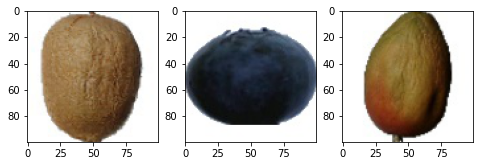

In [4]:
# Antes de começar o trabalho com o Dataset, usamos 3 imagens do dataset numa pasta Samples só para visualizar as imagens

# O objetivo é verificar se existe algum problema em ler os arquivos.


# Local das amostras (neste caso colocamos 3 arquivos)
files_in_dir = os.listdir(sample_folder)
files_per_row = len(files_in_dir)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(8, 5, forward=True)

# Mapear cada arquivo do diretório no gráfico
for i in range(0, len(files_in_dir)):
  file_name = files_in_dir[i]
  image = Image.open(f'{sample_folder}/{file_name}')
  row = math.floor(i / files_per_row)
  col = i % files_per_row
  axs[col].imshow(image)
  #axs[col].axis('off')

# Show the plot
plt.show()

## Parâmetros do Modelo

In [5]:
# Configuração do Modelo: preparação das imagens, classes, número de épocas
batch_size = 15
img_rows, img_cols, img_channels = 32, 32, 1
loss_function = 'categorical_crossentropy'
class_mode = 'categorical'
no_classes = 15 #quantidade de frutas escolhidas
no_epochs = 10
color_mode = 'grayscale'
optimizer = RMSprop(lr = 0.001) #Adam()

## Aplicando configurações no Dataset escolhido

In [6]:

# Preparação das imagens e grupo de treinamento e teste
input_shape = (img_rows, img_cols, img_channels)
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.25) #25% para teste do folder 'Training'

train_generator = train_datagen.flow_from_directory(
    training_folder,
    batch_size=batch_size,
    color_mode = color_mode,
    subset='training',
    class_mode = class_mode,
    shuffle = True,
    target_size=(img_rows, img_cols))


valid_generator = train_datagen.flow_from_directory(
    training_folder,
    batch_size=batch_size,
    color_mode = color_mode,
    subset='validation',
    class_mode = class_mode,
    shuffle = False,
    target_size=(img_rows, img_cols))

# Verificamos quantas imagens possuímos nas classes de frutas selecionadas, para treino e para testes

Found 5477 images belonging to 15 classes.
Found 1818 images belonging to 15 classes.


In [7]:
# Fazendo a contagem de imagens para treino e teste

img_train_count = len(train_generator.classes)
img_test_count = len(valid_generator.classes)

print(img_train_count, 'imagens para treino\n')
print(img_test_count, 'imagens para teste')

5477 imagens para treino

1818 imagens para teste


## Agora vamos criar os modelos de CNN

In [8]:
# Criando o modelo

model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(no_classes))
model.add(Activation('softmax'))

# Monstrando o resumo do Modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [9]:
# Compile the model
checkpoint = ModelCheckpoint("./data/ex8/",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = loss_function,
              optimizer = optimizer,
              metrics = 'accuracy')


history = model.fit_generator(train_generator,
                              steps_per_epoch = img_train_count // batch_size,
                              epochs = no_epochs,
                              callbacks = callbacks,
                              validation_data = valid_generator,
                              validation_steps = img_test_count // batch_size)

    

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
360/365 [============================>.] - ETA: 0s - loss: 1.4909 - accuracy: 0.6462
Epoch 00001: val_loss improved from inf to 0.83788, saving model to ./data/ex8/
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./data/ex8/assets
365/365 [==============================] - 10s 26ms/step - loss: 1.4807 - accuracy: 0.6488 - val_loss: 0.8379 - val_accuracy: 0.8209
Epoch 2/10
360/365 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.9395
Epoch 00002: val_loss did not improve from 0.83788
365/365 [==============================] - 4s 11ms/step - loss: 0.2406 - accuracy: 0.9399 - val_loss: 1.1110 - val_accuracy: 0.8898
Epoch 3/10
363/365 [============================>

In [10]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: name 'X_test' is not defined

In [11]:
# Plotagem da acurácia de Treinamento e Validação
plt.figure(1)
plt.plot(hist.history['accuracy'], 'o-')
plt.plot(hist.history['val_accuracy'], 'x-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'hist' is not defined

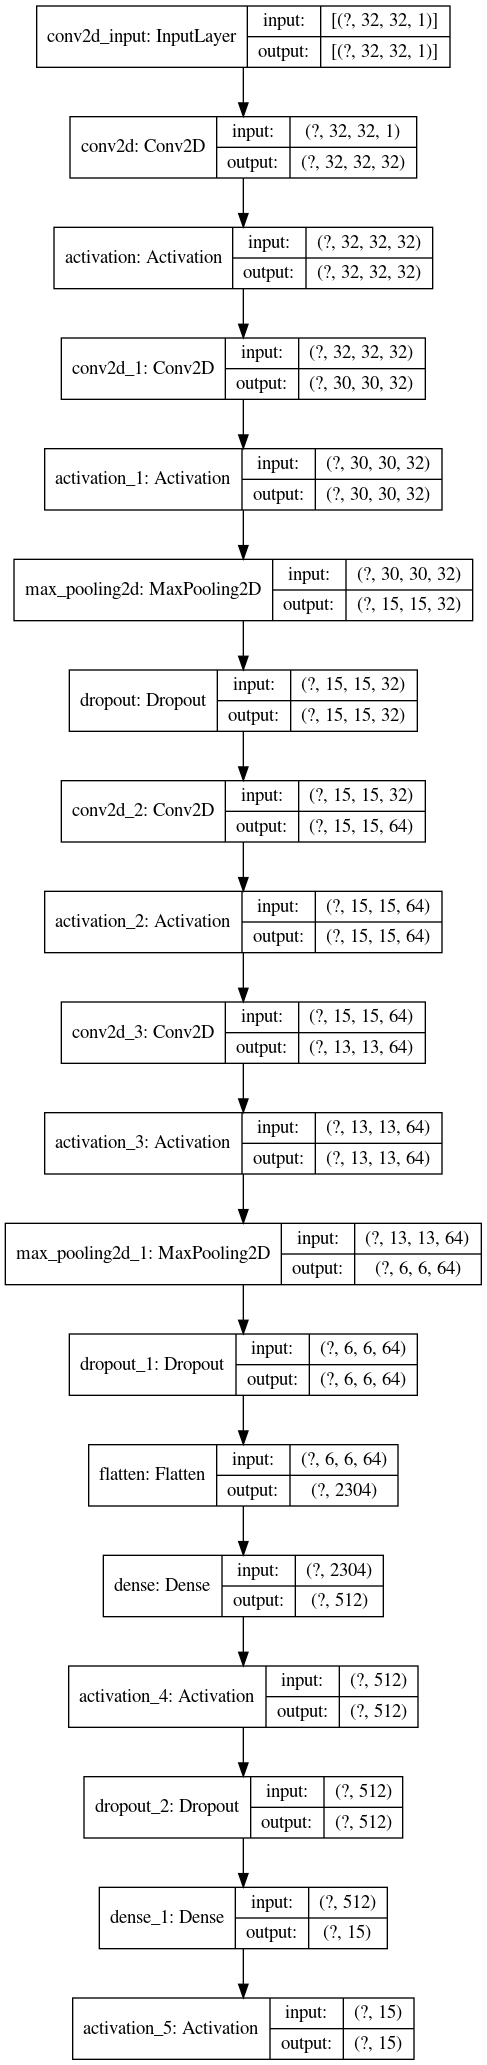

In [14]:
plot_model(model,to_file='8-modelo.png' , show_shapes=True, show_layer_names=True)